# WAITER TIPS ANALISYS

In [1]:
import pandas as pd

In [2]:
pd.set_option('max_columns',None)

In [3]:
df = pd.read_excel('Tips.xlsx')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2.0
1,10.34,1.66,Male,No,Sun,Dinner,3.0
2,21.01,3.50,Male,No,Sun,Dinner,3.0
3,23.68,3.31,Male,No,Sun,Dinner,2.0
4,24.59,3.61,Female,No,Sun,Dinner,4.0


|Variable | Descripción | Tipo de Variable | 
|---------|-------------| -----------------|
|total_bill: | Pago total en dolares incluido el IVA| Independiente | 
|tip:| Propina dada en dolares | Dependiente |
|sex: | Género de la persona quien paga la propina|  Independiente 
|smoker:| Ya sea que la persona fuma o no| Independiente 
|day:| Día de la semana | Independiente 
|time:| lunch or dinner | Independiente 
|size:| Número de personas en la mesa | Independiente 

### El tipo de variable sea da independiente ya que es la variable que se pretende predecir con respecto a los valores de las demas variables


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  245 non-null    object 
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    float64
dtypes: float64(2), object(5)
memory usage: 13.5+ KB


### Encontramos 5 variables de tipo objeto, y dos variables de tipo númerico

In [5]:
df.isnull().sum()

total_bill    0
tip           1
sex           1
smoker        1
day           1
time          1
size          1
dtype: int64

In [6]:
df.drop(244, inplace=True)

In [7]:
df['total_bill'] = df['total_bill'].astype('float')

Se borrá la ultima fila ya que es una fila con datos nulos que se presenta al importar los datos del archivo excel, en esta ocasion venia con la ultima fila de datos nulos.

In [8]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

Rectificamos que no existen datos faltantes o nulos

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    float64
dtypes: float64(3), object(4)
memory usage: 15.2+ KB


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

### Al ser pocas columnas utilizamos 'pairplot' con el fin de ver como se comportan o cual es la relacion entre una varibale y otra siendo de tipo de dato numérico.

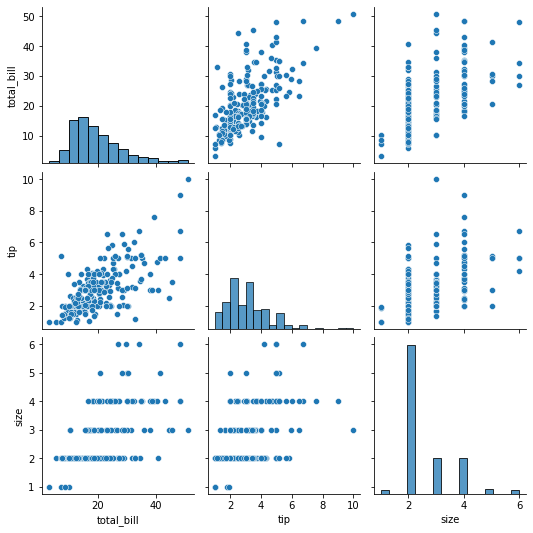

In [11]:
sns.pairplot(df)

La gráfica en su diagonal arroja el comportamiento y distribucion de cada una de las variables numericas:
- La variable 'total_bill' muestra una distribucion sesgada positiva, la mayoria de sus valores son entre 12 y 20 dolares, y a medida que aumenta el valor se presentan menos datos correspondientes.
- Para las propinas ('tip'), no se presenta una distribucion evidente. Su grafica de distribucion muestra que regularmente las propinas van entre 1 y 5 dolares. Tambien muestra que existen valores atipicos correspondientes a propinas de 7-9-10 dolares aproximadamente.
- Finalmente para la variables ('size') que corresponde al numero de personas en la mesa. Se evidencia que la mayoria de veces, la mesa se compone por 2 personas, siendo el valor con mayor frecuencia, seguido de 3 y 4 persona, y finalmente 1,5,6.

Ahora, con respecto a la relación entre las variables:

* Entre 'total_bill' y 'tip', si existe una relación directa positiva, que demuestra que entre más es la cantidad total de cuenta, mayor es la propina.
* Entre 'total_bill' y 'size' también se observa que entre mayor cantidad de personas, mayor es la cantidad en la cuenta de pago, y es lo que corresponde, entre mas personas coman mayor cantidad de dinero se pagará.
* Ahora, entre 'size' y 'tip', al igual que la relacion entre 'total_bill' y 'size', la cantidad de propina aumenta como aumenta la cantidad de personas que se atienden por mesa.

In [25]:
df_numerical = df.select_dtypes(include = ["float64"])
df_numerical.head()

,total_bill,tip,size
0,16.99,1.01,2.0
1,10.34,1.66,3.0
2,21.01,3.50,3.0
3,23.68,3.31,2.0
4,24.59,3.61,4.0


In [26]:
df_numerical.corr(method = 'spearman')

,total_bill,tip,size
total_bill,1.000000,0.678968,0.604791
tip,0.678968,1.000000,0.468268
size,0.604791,0.468268,1.000000


La tabla de correlaciòn, demuestra lo evidenciado por las gràficas anteriores: Entre las variables numèricas existe una relaciòn directa y positiva, `ya que los valores de correlaciòn entre las variables son mayores a 0,5.

### Con lo anterior teniendo en cuenta solo las variables númericas,'total_bill' y 'size' podrian influir en la prediccin de las propinas('tip')

In [15]:
df_categorical = df.select_dtypes(include = ["object"])
df_categorical.head()

,sex,smoker,day,time
0,Female,No,Sun,Dinner
1,Male,No,Sun,Dinner
2,Male,No,Sun,Dinner
3,Male,No,Sun,Dinner
4,Female,No,Sun,Dinner


<AxesSubplot:xlabel='sex'>

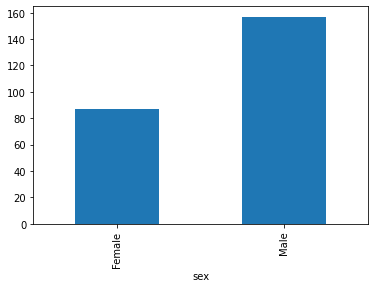

In [24]:
df_categorical.groupby('sex').size().plot.bar()

La gràfica muestra que la mayorìa de personas que pagan la propina son hombres, casi doblando la cantidad de las mujeres. 

## ¿Còmo saber si influye el genero en la cantidad de propina?

Existe un test de Kruskal-Wallis para demostrar si una variable numerica y categorica tienen correlaciòn entre si.

Este test se realiza para determinar si existe o no una diferencia estadísticamente significativa entre las medianas de grupos independientes. Se considera el equivalente no paramétrico del ANOVA de una vía.

- La hipótesis nula (H 0 ): la mediana es igual en todos los grupos.
- La hipótesis alternativa: (Ha): la mediana no es igual en todos los grupos.

In [27]:
from scipy.stats import kruskal

In [28]:
Grupo_male_tip = df[df['sex'] == 'Male']['tip']
Grupo_female_tip = df[df['sex'] == 'Female']['tip']

s, p = kruskal(Grupo_male_tip, Grupo_female_tip)
print(s)
print(p)

0.7615717066668545
0.38283710822789807


### El valor de p no es menor a 0.05, lo cual no refuta la hipotesis nula, por lo cual indica que no hay diferencia significativa entre las medianas de cada grupa por lo que no hay relacion si la persona que paga es Hombre o Mujer con la cantidad de propina que proporciona.

<AxesSubplot:xlabel='smoker'>

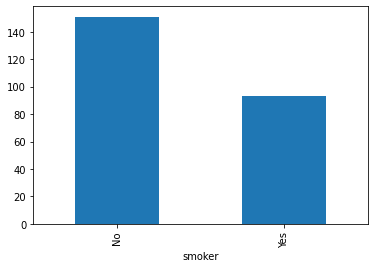

In [33]:
df_categorical.groupby('smoker').size().plot.bar()

La gràfica muestra que la mayoria de personas quienes pagan la propina son no fumadores, pero: 

### ¿influye esta condiciòn en la cantidad de propina que proporciona?

In [35]:
Grupo_noSmoker_tip = df[df['smoker'] == 'No']['tip']
Grupo_Smoker_tip = df[df['smoker'] == 'Yes']['tip']

s, p = kruskal(Grupo_noSmoker_tip, Grupo_Smoker_tip)
print(s)
print(p)

0.07009176991054196
0.7912032101348887


### Al igual que el test anterior, el valor de p no es menor a 0.05, lo cual no refuta la hipotesis nula, por lo cual indica que no hay diferencia significativa entre las medianas de cada grupa por lo que no hay relacion si la persona que paga es fumadora o no con la cantidad de propina que proporciona.

<AxesSubplot:xlabel='day'>

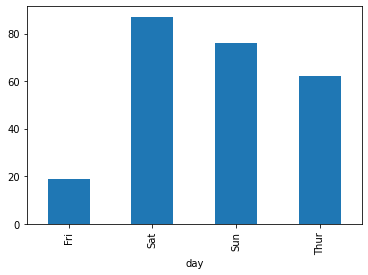

In [37]:
df_categorical.groupby('day').size().plot.bar()

Segùn los datos recopilados, vemos que el sàbado es el dìa con mayor frecuencia de personas, seguido por el domingo y el jueves en ese orden, y finalmente el viernes con menos cantidad de personas.

Antes de ver si el dia influye en las propinas, quisiera observar que dia se presentan mas lunch o dinner.

<AxesSubplot:xlabel='day', ylabel='tip'>

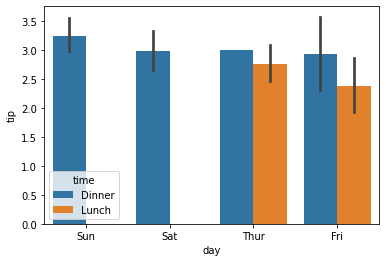

In [47]:
sns.barplot(x ='day', y ='tip', hue = 'time', data=df)

La gràfica muestra que solo en los dias jueves y viernes se presenta lunch, para el resto de dìas incluyendo los anteriores, las personas solo salen a cenar.

### Ahora, ¿influye el dia en la propina? 

In [48]:
Grupo_Thursday_tip = df[df['day'] == 'Thur']['tip']
Grupo_Friday_tip = df[df['day'] == 'Fri']['tip']
Grupo_Saturday_tip = df[df['day'] == 'Sat']['tip']
Grupo_Sunday_tip = df[df['day'] == 'Sun']['tip']

s, p = kruskal(Grupo_Thursday_tip,Grupo_Friday_tip,Grupo_Saturday_tip,Grupo_Sunday_tip)
print(s)
print(p)

8.565587588927167
0.03566056019447427


### La variable del dìa, presenta un comportamiento distinto, el valor de p SI es menor a 0.05, lo cual refuta la hipotesis nula, por lo cual indica que SI hay diferencia significativa entre las medianas de cada grupo, por lo que existe relacion entre la propina y el dia en que se proporciona.

<AxesSubplot:xlabel='time'>

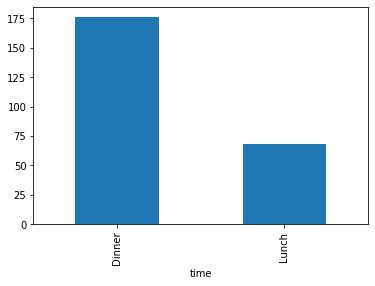

In [50]:
df_categorical.groupby('time').size().plot.bar()

Finalmente mas veces se cena que de lunch, y es entendible, como vimos en la grafica anterior solo los dias jueves y viernes se presentaba lunch, por dicha razon hay mas cantidad de datos con dinner y menos cantidad de datos con lunch, pero:

### ¿Influye que sea lunch o dinner en la propina?

In [51]:
Grupo_lunch_tip = df[df['time'] == 'Lunch']['tip']
Grupo_dinner_tip = df[df['time'] == 'Dinner']['tip']

s, p = kruskal(Grupo_lunch_tip, Grupo_dinner_tip)
print(s)
print(p)

4.782283869130086
0.028753961104527246


### Segùn el valor de p, es menor a 0.05 indica que si hay diferencia significativa entre las medianas de cada grupo... pero de verdad influye en las propinas?

Recordemos que solo los jueves y viernes se presentaba lunch como opciòn, y el resto de dias mas los anteriores la opcion dinner. Ahora esto condiciona la propina, puede ser que el restaurante no ofrezca lunch como opcion en los fines de semana. De igual forma se tendra en cuenta para la prediccion de las propinas.

### Conclusion: 

- 'total_bill'
- 'size'
- 'day'
- 'time'

Se tendran en cuenta para predecir las propinas, ya que 'smoker','sex' no presentan relacion con la variable objetivo.